<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/QMCPACK_Basic_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run Quantum espresso calculations with JARVIS-Tools

In [ ]:
!pip install jarvis-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.1/802.1 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 53.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.2 MB/s eta 0:00:00
  Created wheel for paginate: filename=paginate-0.5.6-py3-none-any.whl size=12666 sha256=8e4b6d258b6e7c205c8ada093c1bb9abb2b9ad5b92cc801a0ea5ef737eeade6e
  Stored in directory: /root/.cache/pip/wheels/47/d3/18/0b5bebc873f29bea61fedece1e92cbcbef416839dfe5bd0eef
Successfully built paginate


# JARVIS-Tools +Quantum Espresso workflow used in: https://www.nature.com/articles/s41524-022-00933-1 and https://pubs.acs.org/doi/abs/10.1021/acs.nanolett.2c04420

In [1]:
%%time
import os
# Clone the QE git
if not os.path.exists('q-e'):
   os.system('git clone https://github.com/QEF/q-e.git')
# Install the dependencies
!apt-get update
!apt-get install -y libfftw3-3 libfftw3-dev libfftw3-doc
%cd q-e
# run the configure file
!DFLAGS='-D__OPENMP -D__FFTW3 -D__MPI -D__SCALAPACK' FFT_LIBS='-lfftw3'  ./configure --enable-openmp
! make pw

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,004 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,347 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,081 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu ja

In [2]:
import os
os.chdir('/content')
if not os.path.exists('qmcpack'):
   os.system('git clone https://github.com/QMCPACK/qmcpack.git')
!apt install python3-mpi4py cython3 libxc-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxc9
Suggested packages:
  cython-doc python3-numpy
The following NEW packages will be installed:
  cython3 libxc-dev libxc9 python3-mpi4py
0 upgraded, 4 newly installed, 0 to remove and 25 not upgraded.
Need to get 13.7 MB of archives.
After this operation, 49.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 cython3 amd64 0.29.28-1ubuntu3 [1,336 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libxc9 amd64 5.1.7-1ubuntu1 [3,900 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libxc-dev amd64 5.1.7-1ubuntu1 [8,038 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-mpi4py amd64 3.1.3-1build2 [465 kB]
Fetched 13.7 MB in 2s (7,564 kB/s)
Selecting previously unselected package cython3.
(Reading database ... 121133 files and directorie

In [3]:
%%time
import os
os.chdir('qmcpack/build')
!cmake ..

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- ENABLE_CUDA disabled
-- GPU device architectures: 
-- Defining the float point precision
   Base precision = double
   Full precision = double
-- CMAKE_BUILD_TYPE is RELEASE
-- Enable sanitizer ENABLE_SANITIZER=none
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Trying to figure out compiler options ....
-- C++ Compiler is identified by QMCPACK as : GNU
-- Looking for C++ include cst

In [4]:
%%time
!make -j 2

[  0%] Building CXX object src/Platforms/Host/CMakeFiles/platform_host_runtime.dir/sysutil.cpp.o
[  0%] Building CXX object src/Platforms/CPU/CMakeFiles/platform_cpu_runtime.dir/math.cpp.o
[  0%] Linking CXX static library libplatform_cpu_runtime.a
[  0%] Built target platform_cpu_runtime
[  0%] Building CXX object src/Utilities/CMakeFiles/cxx_helpers.dir/ModernStringUtils.cpp.o
[  1%] Building CXX object src/Platforms/Host/CMakeFiles/platform_host_runtime.dir/InfoStream.cpp.o
[  2%] Linking CXX static library libcxx_helpers.a
[  2%] Built target cxx_helpers
[  2%] Building CXX object src/Utilities/CMakeFiles/qmcrng.dir/FakeRandom.cpp.o
[  2%] Building CXX object src/Platforms/Host/CMakeFiles/platform_host_runtime.dir/OutputManager.cpp.o
[  2%] Building CXX object src/Utilities/CMakeFiles/qmcrng.dir/RandomGenerator.cpp.o
[  2%] Linking CXX static library libplatform_host_runtime.a
[  2%] Built target platform_host_runtime
[  2%] Built target gitrev
[  2%] Building C object src/einsplin

In [10]:
!pwd

/content/qmcpack/external_codes/quantum_espresso


In [11]:
import os
os.chdir('/content/qmcpack/external_codes/quantum_espresso')
!./download_and_patch_qe6.3.sh

Streaming output truncated to the last 5000 lines.
q-e-qe-6.3/GUI/Guib/doc/diagrams/PWgui.png
q-e-qe-6.3/GUI/Guib/doc/diagrams/myGUI.dia
q-e-qe-6.3/GUI/Guib/doc/diagrams/myGUI.png
q-e-qe-6.3/GUI/Guib/doc/diagrams/myGUI.tcl
q-e-qe-6.3/GUI/Guib/doc/diagrams/parsing.dia
q-e-qe-6.3/GUI/Guib/doc/diagrams/parsing.png
q-e-qe-6.3/GUI/Guib/doc/diagrams/topng.sh
q-e-qe-6.3/GUI/Guib/doc/robodoc.rc
q-e-qe-6.3/GUI/Guib/doc/usage.tex
q-e-qe-6.3/GUI/Guib/examples/
q-e-qe-6.3/GUI/Guib/examples/README
q-e-qe-6.3/GUI/Guib/examples/dimension.inp
q-e-qe-6.3/GUI/Guib/examples/dimension.tcl
q-e-qe-6.3/GUI/Guib/examples/kpoints.inp
q-e-qe-6.3/GUI/Guib/examples/kpoints.tcl
q-e-qe-6.3/GUI/Guib/examples/pages.inp
q-e-qe-6.3/GUI/Guib/examples/pages.tcl
q-e-qe-6.3/GUI/Guib/examples/run.sh
q-e-qe-6.3/GUI/Guib/examples/simpleSim.inp
q-e-qe-6.3/GUI/Guib/examples/simpleSim.tcl
q-e-qe-6.3/GUI/Guib/examples/two_pages.tcl
q-e-qe-6.3/GUI/Guib/examples/validate.inp
q-e-qe-6.3/GUI/Guib/examples/validate.tcl
q-e-qe-6.3/GUI/

In [15]:
import os
os.chdir('/content/qmcpack/external_codes/quantum_espresso/qe-6.3')

In [16]:
!./configure --with-hdf5=/content

checking build system type... x86_64-pc-linux-gnu
checking ARCH... x86_64
checking setting AR... ... ar
checking setting ARFLAGS... ... ruv
checking for gfortran... gfortran
checking whether the Fortran compiler works... yes
checking for Fortran compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU Fortran compiler... yes
checking whether gfortran accepts -g... yes
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether we are using the GNU Fortran compiler... (cached) yes
checking whether gfortran accepts -g... (cached) yes
checking for Fortran flag to compile .f90 files... none
checking for mpif90... mpif90
checking whether we are using the GNU Fortran compiler... yes
checking whether mpif90 accepts

In [18]:
!ls /content/qmcpack/nexus/lib

basisset.py		 pyscf_analyzer.py
bundle.py		 pyscf_input.py
debug.py		 pyscf_sim.py
developer.py		 qmcpack_analyzer_base.py
execute.py		 qmcpack_analyzer.py
fileio.py		 qmcpack_converters.py
gamess_analyzer.py	 qmcpack_input.py
gamess_input.py		 qmcpack_method_analyzers.py
gamess.py		 qmcpack_property_analyzers.py
gaussian_process.py	 qmcpack.py
generic.py		 qmcpack_quantity_analyzers.py
grid_functions.py	 qmcpack_result_analyzers.py
hdfreader.py		 quantum_package_analyzer.py
machines.py		 quantum_package_input.py
memory.py		 quantum_package.py
nexus_base.py		 rmg_analyzer.py
nexus.py		 rmg_input.py
numerics.py		 rmg.py
observables.py		 simulation.py
periodic_table.py	 structure.py
physical_system.py	 superstring.py
plotting.py		 template_simulation.py
project_manager.py	 testing.py
pseudopotential.py	 unit_converter.py
pwscf_analyzer.py	 utilities.py
pwscf_data_reader.py	 vasp_analyzer.py
pwscf_input.py		 vasp_input.py
pwscf_postprocessors.py  vasp.py
pwscf.py		 versions.py
__pycache__

In [9]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         46 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  2
  On-line CPU(s) list:   0,1
Vendor ID:               GenuineIntel
  Model name:            Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:          6
    Model:               79
    Thread(s) per core:  2
    Core(s) per socket:  1
    Socket(s):           1
    Stepping:            0
    BogoMIPS:            4399.99
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscal
                         l nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopo
                         logy nonstop_tsc cpuid tsc_known_freq pni pclmulqdq sss
                         e3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes 
                         xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowpref

In [ ]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2200.214
BogoMIPS:                        4400.42
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

In [ ]:
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
import numpy as np
import pandas as pd

dft_3d = data('dft_3d')
df=pd.DataFrame(dft_3d)
#Filter based on elements
def has_elements(atoms_dict = {}, my_element = ['Al','O']):
    atoms = Atoms.from_dict(atoms_dict)
    elements = atoms.elements
    if set(my_element)==set(elements):
        return True
    else:
        return np.nan

df['el'] = df['atoms'].apply(lambda x: has_elements(atoms_dict = x, my_element = ['Si']))
df1 = df.dropna()
df_eform_filter = df1[df1['formation_energy_peratom']==0]
df_eform_filter



Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


,jid,spg_number,spg_symbol,formula,formation_energy_peratom,func,optb88vdw_bandgap,atoms,slme,magmom_oszicar,...,poisson,raw_files,nat,bulk_modulus_kv,shear_modulus_gv,mbj_bandgap,hse_gap,reference,search,el
25912,JVASP-24792,227,Fd-3m,Si,0.0,OptB88vdW,0.731,"{'lattice_mat': [[3.3641546699579417, -2.54062...",33.23,0.0,...,na,"[DFPT,JVASP-24792.zip,https://ndownloader.figs...",2,na,na,1.277,na,mp-149,-Si,True
42489,JVASP-1002,227,Fd-3m,Si,-0.0,OptB88vdW,0.731,"{'lattice_mat': [[3.3641499856336465, -2.50271...",33.23,0.0,...,0.21,"[FD-ELAST,JVASP-1002.zip,https://ndownloader.f...",2,87.27,63.28,1.277,1.22,mp-149,-Si,True


In [ ]:
#Lets select JVASP-1002
from jarvis.db.figshare import get_jid_data
from jarvis.tasks.qe.super import SuperCond
from jarvis.core.utils import get_factors
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data, get_jid_data
from jarvis.core.kpoints import Kpoints3D
from jarvis.tasks.queue_jobs import Queue
from jarvis.db.jsonutils import dumpjson
import os
from jarvis.analysis.structure.spacegroup import Spacegroup3D
import glob
from jarvis.db.jsonutils import loadjson

jid = 'JVASP-1002' #Silicon
dat = get_jid_data(jid=jid, dataset="dft_3d")

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


In [ ]:
qe_cmd = "/content/q-e/bin/pw.x"
a_atoms = Atoms.from_dict(dat["atoms"])
atoms = Spacegroup3D(a_atoms).refined_atoms.get_primitive_atoms
kp = Kpoints3D().automatic_length_mesh(lattice_mat=atoms.lattice_mat, length=dat["kpoint_length_unit"])
kpts = kp._kpoints[0]
print ('kpts',kpts)


kpts [11, 11, 11]


In [ ]:
from jarvis.tasks.qe.qe import QEjob
relax = {
            "control": {
                # "calculation": "'scf'",
                "calculation":  "'vc-relax'",
                "restart_mode": "'from_scratch'",
                "prefix": "'RELAX'",
                "outdir": "'./'",
                "tstress": ".true.",
                "tprnfor": ".true.",
                "disk_io": "'nowf'",
                "wf_collect": ".true.",
                "pseudo_dir": None,
                "verbosity": "'high'",
                "nstep": 100,
            },
            "system": {
                "ibrav": 0,
                "nat": None,
                "ntyp": None,
                "ecutwfc": 45,
                "ecutrho": 250,
                "q2sigma": 1,
                "ecfixed": 44.5,
                "qcutz": 800,
                "occupations": "'smearing'",
                "degauss": 0.01,
                "lda_plus_u": ".false.",
            },
            "electrons": {
                "diagonalization": "'david'",
                "mixing_mode": "'local-TF'",
                "mixing_beta": 0.3,
                "conv_thr": "1d-9",
            },
            "ions": {"ion_dynamics": "'bfgs'"},
            "cell": {"cell_dynamics": "'bfgs'", "cell_dofree": "'all'"},
        }
qejob_relax = QEjob(
    atoms=a_atoms,
    input_params=relax,
    output_file="relax.out",
    qe_cmd=qe_cmd,
    jobname="relax",
    kpoints=kp,
    input_file="arelax.in",
    url=None,
    psp_dir=None,
    psp_temp_name=None,
)

Please cite for PSPs:
https://doi.org/10.1016/j.commatsci.2013.08.053


In [ ]:
%%time
info = qejob_relax.runjob()

Sanitizing Atoms.
cmd /content/q-e/bin/pw.x<arelax.in
HERE1
HERE2 /content/q-e/q-e/RELAX.save/data-file-schema.xml
CPU times: user 2.44 s, sys: 375 ms, total: 2.82 s
Wall time: 8min 11s


In [ ]:
!ls

archive		 dft-d3			KCW	    PHonon	   std.err
arelax.in	 Doc			KS_Solvers  PP		   TDDFPT
atomic		 environment_variables	LAXlib	    pseudo	   test-suite
bin		 EPW			License     PW		   upflib
cmake		 external		logo.jpg    PWCOND	   UtilXlib
CMakeLists.txt	 FFTXlib		LR_Modules  QEHeat	   XClib
configure	 GUI			Makefile    README_GPU.md  XSpectra
CONTRIBUTING.md  GWW			make.inc    README.md
COUPLE		 HP			MBD	    relax.json
CPV		 include		Modules     relax.out
dev-tools	 install		NEB	    RELAX.save


In [ ]:
info

{'out_path': '/content/q-e/q-e/relax.out',
 'xml_path_': 'na',
 'total_energy': -260.14064640715867,
 'job_done': True,
 'xml_path': '/content/q-e/q-e/RELAX.save/data-file-schema.xml'}

In [ ]:
from jarvis.io.qe.outputs import DataFileSchema
ds = DataFileSchema('/content/q-e/RELAX.save/data-file-schema.xml')

In [ ]:
print(ds.final_energy) #Hartree, QE usually reports data in Ha

-9.559993249944725


In [ ]:
print(ds.final_energy_breakdown) #eV

{'etot': -260.1406464056546, 'eband': 8.43745558494172, 'ehart': 14.900605434130384, 'vtxc': -90.79550456760238, 'etxc': -116.00515742493373, 'ewald': -228.46781489837625, 'demet': -2.198274517421642e-05}


In [ ]:
print(ds.final_structure)

Si2
1.0
3.326542426344914 -8.687857022623688e-10 1.9205801644522624
1.1088474746292054 3.1362944762735903 1.9205801644522624
6.312949592895172e-18 5.790257300394911e-18 3.8411603289045257
Si
2
Cartesian
3.880966163142504 2.7442576154190497 6.722030575582919
0.5544237378316195 0.39203685998575666 0.9602900822261315



In [ ]:
print(ds.indir_gap)

0.4883906213979321


In [ ]:
print(ds.nelec)

8


In [ ]:
print(ds.efermi)

6.36874195429499


In [ ]:
import numpy as np
%matplotlib inline
hartree_to_ev = 27.2113839

def dos(data, smearing=0.2):
    """Density of states."""
    """Based on sum of gaussians with smearing as given"""

    #TODO: make work nicely for spin-polarized case, with minority spins plotted negative.

    nkpts = data.nkpts
    eigvals = []
    kweight = []
    for i in range(nkpts):
        eig = np.array(
            data.data["qes:espresso"]["output"]["band_structure"][
                "ks_energies"
            ][i]["eigenvalues"]["#text"].split(),
            dtype="float",
        )
        eigvals.append(eig)
        kweight.append(float(data.data["qes:espresso"]["output"]["band_structure"]["ks_energies"][i]["k_point"]["@weight"]))


    efermi = data.efermi
    eigvals = np.array(eigvals) * hartree_to_ev - efermi
    kweight = np.array(kweight)


    minval = np.min(np.array(eigvals))
    maxval = np.max(np.array(eigvals))



    energies = np.arange(minval-0.5, maxval+0.5, 0.01)
    de = 0.01
    norm = (1/2.0/np.pi/smearing**2)**0.5
    DOS = np.zeros(np.shape(energies)[0])

    for k in range(nkpts):
        for e in eigvals[k,:]:
            DOS += kweight[k] *norm * np.exp( -0.5*(energies - e)**2 / smearing**2)
    return energies, DOS

energies, DOS = dos(ds)

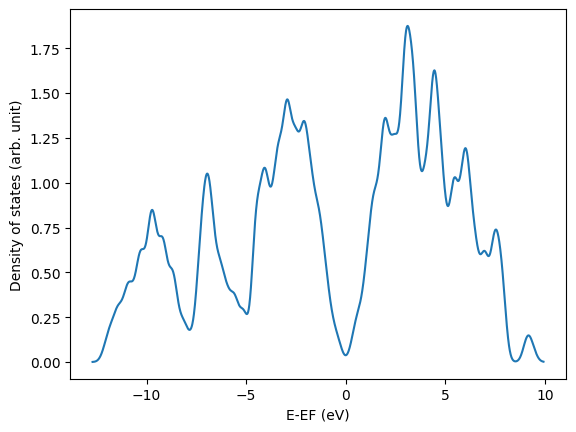

In [ ]:
import matplotlib.pyplot as plt
plt.plot(energies, DOS)
plt.xlabel('E-EF (eV)')
plt.ylabel('Density of states (arb. unit)')
plt.show()

In [ ]:
#Other data available in xml file
import pprint
pprint.pprint(ds.data)

Streaming output truncated to the last 5000 lines.
                                                                                          '3.587914876297408E-01   '
                                                                                          '3.956384663773496E-01   '
                                                                                          '4.602641673201964E-01',
                                                                                 '@size': '8'},
                                                                 'k_point': {'#text': '8.822181873924251E-11   '
                                                                                      '3.377975356063768E-01   '
                                                                                      '3.677474007517164E-01',
                                                                             '@weight': '6.0105184072126424E-003'},
                                                   